In [1]:
import warnings
warnings.filterwarnings("ignore") #To avoid warnings.
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv("fiat500.csv")
df

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
...,...,...,...,...,...,...,...,...,...
1533,1534,sport,51,3712,115280,1,45.069679,7.704920,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.666870,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.413480,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.682270,5990


In [3]:
#returns no of (rows,columns)
print(df.shape)

(1538, 9)


In [5]:
#find sum of the null values in each column
print(df.isnull().sum())

ID                 0
model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64


In [7]:
dfcor = df.drop(columns = ['ID','model','lat','lon'])
dfcor.corr()

,engine_power,age_in_days,km,previous_owners,price
engine_power,1.000000,0.319190,0.285495,-0.005030,-0.277235
age_in_days,0.319190,1.000000,0.833890,0.075775,-0.893328
km,0.285495,0.833890,1.000000,0.097539,-0.859373
previous_owners,-0.005030,0.075775,0.097539,1.000000,-0.076274
price,-0.277235,-0.893328,-0.859373,-0.076274,1.000000


In [33]:
sportcount = df.loc[df['model'] == 'sport']
sportcount.count()

ID                 86
model              86
engine_power       86
age_in_days        86
km                 86
previous_owners    86
lat                86
lon                86
price              86
dtype: int64

In [32]:
loungecount = df.loc[df['model'] == 'lounge']
loungecount.count()

ID                 1094
model              1094
engine_power       1094
age_in_days        1094
km                 1094
previous_owners    1094
lat                1094
lon                1094
price              1094
dtype: int64

In [31]:
popcount = df.loc[df['model'] == 'pop']
popcount.count()

ID                 358
model              358
engine_power       358
age_in_days        358
km                 358
previous_owners    358
lat                358
lon                358
price              358
dtype: int64

In [34]:
sportavg = sportcount.drop(columns = ['ID','model','lat','lon'])

In [23]:
sportavg.describe()

,engine_power,age_in_days,km,previous_owners,price
count,86.000000,86.000000,86.000000,86.000000,86.000000
mean,55.465116,3310.372093,103382.802326,1.267442,6275.406977
std,8.210034,1165.134994,43041.072473,0.602435,1916.322860
min,51.000000,517.000000,6200.000000,1.000000,3800.000000
25%,51.000000,3020.750000,72425.000000,1.000000,4892.500000
50%,51.000000,3684.000000,102400.000000,1.000000,5800.000000
75%,56.250000,4139.000000,129973.000000,1.000000,6900.000000
max,74.000000,4658.000000,190000.000000,4.000000,10800.000000


In [25]:
sportavg.mean()

engine_power           55.465116
age_in_days          3310.372093
km                 103382.802326
previous_owners         1.267442
price                6275.406977
dtype: float64

In [29]:
popavg = popcount.drop(columns = ['ID','model','lat','lon'])
popavg.describe()

,engine_power,age_in_days,km,previous_owners,price
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,52.083799,1904.508380,61320.100559,1.108939,7987.349162
std,4.243131,1238.086949,38277.729326,0.384400,1838.241284
min,51.000000,366.000000,3000.000000,1.000000,2500.000000
25%,51.000000,790.000000,30000.000000,1.000000,6900.000000
50%,51.000000,1751.000000,54099.000000,1.000000,7999.500000
75%,51.000000,2769.000000,85875.000000,1.000000,9500.000000
max,77.000000,4658.000000,201000.000000,4.000000,11090.000000


In [28]:
popavg.mean()

engine_power          52.083799
age_in_days         1904.508380
km                 61320.100559
previous_owners        1.108939
price               7987.349162
dtype: float64

In [35]:
loungeavg = loungecount.drop(columns = ['ID','model','lat','lon'])
loungeavg.describe()

,engine_power,age_in_days,km,previous_owners,price
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,51.565814,1437.570384,46873.445155,1.117002,8949.486289
std,3.181137,1203.670113,37051.887997,0.406966,1798.159691
min,51.000000,366.000000,1232.000000,1.000000,2900.000000
25%,51.000000,640.000000,18826.500000,1.000000,7800.000000
50%,51.000000,790.000000,33105.500000,1.000000,9500.000000
75%,51.000000,2192.000000,67000.000000,1.000000,10400.000000
max,77.000000,4658.000000,235000.000000,4.000000,11100.000000


In [38]:
loungeavg['km'].mean()

46873.445155393056

In [39]:
loungeavg['km'].max()

235000

In [43]:
x = sportcount.drop(columns = ['ID','model','engine_power','lat','lon','price'])
y = sportcount['price']

###### print(x)

In [45]:
print(y)

2        4200
8        5600
9        6000
27       4950
33       5200
        ...  
1498    10800
1501     4500
1504     4500
1531     4750
1533     5200
Name: price, Length: 86, dtype: int64


In [2]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()

In [48]:
model.fit(x,y)

LinearRegression()

In [59]:
age = int(input("Enter the car age in days:"))
km = int(input("Enter the km a car runs:"))
owners = int(input("Enter the previous owner:"))
ans = model.predict([[age,km,owners]])
print("Price: %d"%ans[0])

Enter the car age in days: 4645
Enter the km a car runs: 72626
Enter the previous owner: 2


Price: 5002


In [69]:
model1 = LinearRegression()
model1.fit(x,y)

LinearRegression()

In [74]:
def function(car_type):
    n = int(input("Number of Cars:"))
    list1 = []
    print("\n---------------------------------------------------------------------------\nEnter the details of cars\n---------------------------------------------------------------------------")
    for i in range(1,n+1):
        if(car_type == "sport"):
            x = sportcount.drop(columns = ['ID','model','engine_power','lat','lon','price'])
            y = sportcount['price']
        elif(car_type == "pop"):
            x = popcount.drop(columns = ['ID','model','engine_power','lat','lon','price'])
            y = popcount['price']
        elif(car_type == "lounge"):
            x = loungecount.drop(columns = ['ID','model','engine_power','lat','lon','price'])
            y = loungecount['price']
        print(f"Car {i}:")
        age = int(input(f"Enter the car {i} age in days:"))
        km = int(input(f"Enter the km a car {i} runs:"))
        owners = int(input(f"Enter the car {i} previous owner count:"))
        ans = model1.predict([[age,km,owners]])
        list1.append(ans[0])
        print()
    print("\n---------------------------------------------------------------------------\nPrice details\n---------------------------------------------------------------------------")
    for j in range(1,n+1):
        print(f"price of {car_type} Car {j} is:",end ="")
        print("%d"%list1[j-1])
#------------------------------------------------------------------------------------------------------------------------------------------------------------
car_type = input("Enter the model of the car:")
if(car_type == "sport" or car_type == "pop" or car_type == "lounge"):
    function(car_type)
else:
    print("Enter correct car model:(sport or pop or lounge):")
    car_type = input("Enter the model of the car:")
    function(car_type)

Enter the model of the car: 2


Enter correct car model:(sport or pop or lounge):


Enter the model of the car: sport
Number of Cars: 2



---------------------------------------------------------------------------
Enter the details of cars
---------------------------------------------------------------------------
Car 1:


Enter the car 1 age in days: 2190
Enter the km a car 1 runs: 70000
Enter the car 1 previous owner count: 1



Car 2:


Enter the car 2 age in days: 2190
Enter the km a car 2 runs: 70000
Enter the car 2 previous owner count: 2




---------------------------------------------------------------------------
Price details
---------------------------------------------------------------------------
price of sport Car 1 is:8017
price of sport Car 2 is:7910


In [81]:
dfff = df.drop(columns=['ID','engine_power','lat','lon','price'])

In [82]:
newdf = pd.get_dummies(dfff,dtype=int)
newdf

,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
0,882,25000,1,1,0,0
1,1186,32500,1,0,1,0
2,4658,142228,1,0,0,1
3,2739,160000,1,1,0,0
4,3074,106880,1,0,1,0
...,...,...,...,...,...,...
1533,3712,115280,1,0,0,1
1534,3835,112000,1,1,0,0
1535,2223,60457,1,0,1,0
1536,2557,80750,1,1,0,0


In [83]:
x1 = newdf
x2 = df['price']

In [86]:
model1.fit(x1,x2)

LinearRegression()

In [94]:
#for all model of car
n = int(input("Enter the number of time you want to check the price:"))
listnest = []
print("\n---------------------------------------------------------------------------\nEnter the details of cars\n---------------------------------------------------------------------------")
for i in range(1,n+1):
    list = []
    print(f"Car {i}:")
    m = 0
    car_type = input("Enter car type:")
    list.append(car_type)
    age = int(input("Enter the car age in days:"))
    list.append(age)
    km = int(input("Enter the km a car runs:"))
    list.append(km)
    owners = int(input("Enter the car previous owner count:"))
    list.append(owners)
    if(car_type == "lounge"):
        l,p,s = 1,0,0
    elif(car_type == "pop"):
        l,p,s = 0,1,0
    else:
        l,p,s = 0,0,1
    ans = model1.predict([[age,km,owners,l,p,s]])
    list.append(ans[0])
    listnest.append(list)
    print()
print("---------------------------------------------------------------------------\nPrice details\n---------------------------------------------------------------------------")
for j in range(1,n+1):
    print(f"The {listnest[j-1][0]} model car, have used by {listnest[j-1][1]} days, runs {listnest[j-1][2]}km and used by {listnest[j-1][3]} owners.\nTherefore Price is:%d$\n"%listnest[j-1][4])

Enter the number of time you want to check the price: 3



---------------------------------------------------------------------------
Enter the details of cars
---------------------------------------------------------------------------
Car 1:


Enter car type: pop
Enter the car age in days: 3258
Enter the km a car runs: 78681
Enter the car previous owner count: 1



Car 2:


Enter car type: lounge
Enter the car age in days: 2647
Enter the km a car runs: 97700
Enter the car previous owner count: 1



Car 3:


Enter car type: sport
Enter the car age in days: 2009
Enter the km a car runs: 86000
Enter the car previous owner count: 2



---------------------------------------------------------------------------
Price details
---------------------------------------------------------------------------
The pop car, have used by 3258 days, runs 78681km and used by 1 owners.
Therefore Price is:6502
The lounge car, have used by 2647 days, runs 97700km and used by 1 owners.
Therefore Price is:6986
The sport car, have used by 2009 days, runs 86000km and used by 2 owners.
Therefore Price is:7723


In [ ]:
"""
Training and Testing sets:
    * Training sets will have the analysis.
    * Testing sets will be inputs.
"""

In [93]:
from sklearn.model_selection import train_test_split

In [155]:
x1_train,x1_test,x2_train,x2_test = train_test_split(x1,x2,test_size=0.33)

In [125]:
print(x1_train.shape)
print(x2_train.shape)
print(x1_test.shape)
print(x2_test.shape)

(1030, 6)
(1030,)
(508, 6)
(508,)


In [156]:
finalans = LinearRegression()

In [157]:
finalans.fit(x1_train,x2_train)

LinearRegression()

In [159]:
ans = finalans.predict(x1_test)
ans

array([10451.32097243,  8666.0404998 ,  8944.50558906,  5181.08379625,
       10353.63241421,  6610.08852325,  6043.58009754,  5457.12648259,
        9273.5016794 ,  6007.92942136, 10541.62511747,  9915.65090682,
        4804.93830123, 10343.19022174,  9351.12868333, 10180.46238607,
        5846.18612305,  9994.11909677, 10351.43379505,  5469.57047148,
        7748.84974908, 10395.45106922,  9763.64203578,  9763.64203578,
        5465.045272  ,  5766.04678972, 10341.71311028, 10203.87205226,
       10050.14411897,  9819.69037489,  9189.68795501, 10476.40840414,
        6247.44733174, 10401.30895905,  5331.21621472,  8914.89733816,
       10191.65887616, 10348.61255889,  8330.96740523,  7084.25402002,
       10027.10914296,  9671.0637461 ,  9290.13485717, 10378.87676196,
        9946.55610553,  9403.65242639,  9948.04268436,  7143.19621448,
        9798.38932575,  8368.11829791,  9458.13294101,  3340.8568713 ,
        6477.60810727,  9541.49663592, 10094.22086337,  7321.01406223,
      

In [118]:
#for all model of car
n = int(input("Enter the number of time you want to check the price:"))
listnest = []
print("\n---------------------------------------------------------------------------\nEnter the details of cars\n---------------------------------------------------------------------------")
for i in range(1,n+1):
    list = []
    print(f"Car {i}:")
    m = 0
    car_type = input("Enter car type:")
    list.append(car_type)
    age = int(input("Enter the car age in days:"))
    list.append(age)
    km = int(input("Enter the km a car runs:"))
    list.append(km)
    owners = int(input("Enter the car previous owner count:"))
    list.append(owners)
    if(car_type == "lounge"):
        l,p,s = 1,0,0
    elif(car_type == "pop"):
        l,p,s = 0,1,0
    else:
        l,p,s = 0,0,1
    ans = finalans.predict([[age,km,owners,l,p,s]])
    list.append(ans[0])
    listnest.append(list)
    print()
print("---------------------------------------------------------------------------\nPrice details\n---------------------------------------------------------------------------")
for j in range(1,n+1):
    print(f"The {listnest[j-1][0]} model car, have used by {listnest[j-1][1]} days, runs {listnest[j-1][2]}km and used by {listnest[j-1][3]} owners.\nTherefore Price is:%d$\n"%listnest[j-1][4])

Enter the number of time you want to check the price: 1



---------------------------------------------------------------------------
Enter the details of cars
---------------------------------------------------------------------------
Car 1:


Enter car type: sport
Enter the car age in days: 2190
Enter the km a car runs: 70000
Enter the car previous owner count: 1



---------------------------------------------------------------------------
Price details
---------------------------------------------------------------------------
The sport model car, have used by 2190 days, runs 70000km and used by 1 owners.
Therefore Price is:7812$



In [160]:
x11_train,x11_test,x22_train,x22_test = train_test_split(x1,x2,test_size=0.15)
finalans2 = LinearRegression()
finalans2.fit(x11_train,x22_train)
ans2 = finalans2.predict(x11_test)
print(ans2)

[ 5477.78060053  9214.12317564 10433.84316253  9718.33957489
  9954.02395455  9325.68747559  9804.87789844  9260.31438274
  8504.48270027  8876.96686209  9800.64557881  8850.77608184
  7147.33230073  5458.60689025 10398.73405455  9680.91091821
  9627.26032011 10203.73527698  7781.35530612  9248.38255349
  9944.15330442  7966.95176334  9623.92005338  9330.78185087
  9947.78322317  4028.47242285  9869.1423572   9614.4304547
  8840.45831277 10552.18426134 10294.58244891  4965.43073045
  8877.31738526  9403.36683084 10426.37830291  8308.4738209
  9876.00442691  9390.78288592  5657.84965272  7118.92852068
 10329.32611119  5765.23300214  4397.05945813  9627.26032011
  5151.42088463 10459.27401592 10013.12222951  7059.55190018
 10385.93559783  7038.88651655 10368.97362507  6856.49632352
  9914.6321812   9788.25980525  8156.5137202   9723.13276284
  5528.94512317  9811.4518834   6783.9023097   4540.50116133
 10079.79955295  7747.32359817  6482.5966936   9845.9777022
  8335.2444553   7564.13806

<Axes: xlabel='km', ylabel='price'>

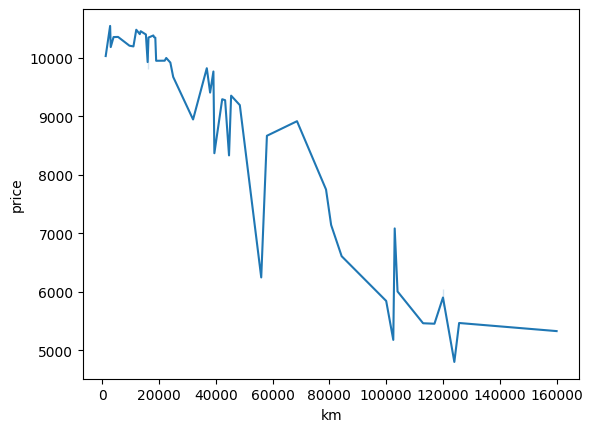

In [161]:
result1 = pd.DataFrame(columns=['km','price'])
result1['km'] = x1_test['km']
result1['price'] = ans
sns.lineplot(x='km',y='price',data=result1.head(50))

<Axes: xlabel='km', ylabel='price'>

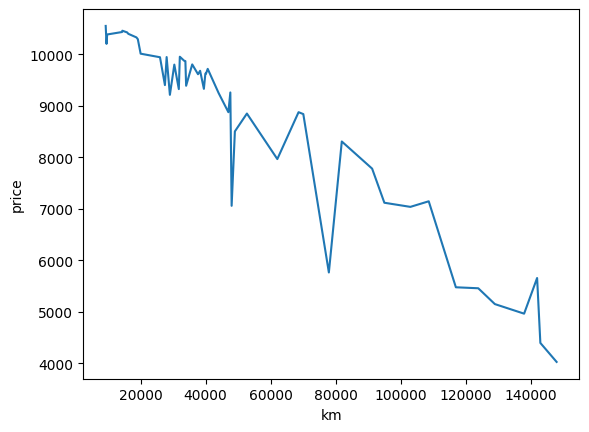

In [162]:
result2 = pd.DataFrame(columns=['km','price'])
result2['km'] = x11_test['km']
result2['price'] = ans2
sns.lineplot(x='km',y='price',data=result2.head(50))

<Axes: xlabel='km', ylabel='price'>

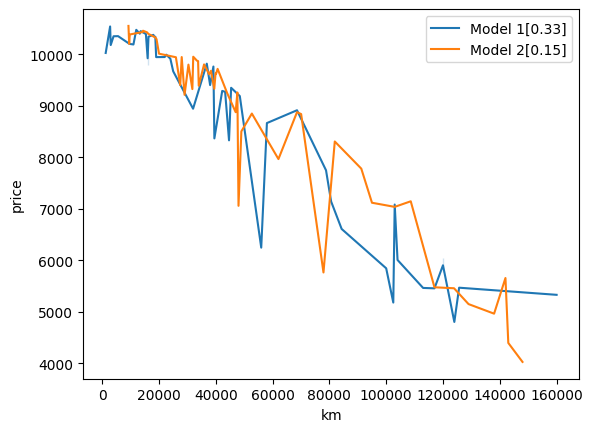

In [164]:
sns.lineplot(x='km',y='price',data=result1.head(50),label="Model 1[0.33]")
sns.lineplot(x='km',y='price',data=result2.head(50),label="Model 2[0.15]")

In [85]:
hr = pd.read_csv("hiring.csv")

In [62]:
hr

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [87]:
hr["experience"].fillna("zero",inplace=True)

In [88]:
print(hr)

  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0       zero                    8.0                           9      50000
1       zero                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000


In [65]:
hr["test_score(out of 10)"].fillna(hr["test_score(out of 10)"].mean(),inplace=True)

In [67]:
hr

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [70]:
hr['experience'] = hr['experience'].map({0:0,"five":5,"two":2,"seven":7,"three":3,"ten":10,"eleven":11})

In [71]:
hr

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [72]:
x = hr.drop(columns = ['salary($)'])
y = hr['salary($)']

In [73]:
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


In [74]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [75]:
hrmodel = LinearRegression()
hrmodel.fit(x,y)

LinearRegression()

In [105]:
exp = int(input("Enter your experience:"))
test = int(input("Enter your test score"))
inter = int(input("Enter your interview score"))
hrans = hrmodel.predict([[exp,test,inter]])
print("Salary will be:$",hrans[0])

Enter your experience: 2
Enter your test score 6
Enter your interview score 9


Salary will be:$ 54143.00441016028


In [78]:
hrans

array([53290.89255945])

In [79]:
!pip install word2number

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5589 sha256=1de3f9303002f100ca328292326e3b65c2eba2be4c018412dd4f4a7d3a863586
  Stored in directory: c:\users\jashwanth kumar v\appdata\local\pip\cache\wheels\5b\79\fb\d25928e599c7e11fe4e00d32048cd74933f34a74c633d2aea6
Successfully built word2number


In [82]:
import word2number 

In [83]:
from word2number import w2n

In [89]:
hr["experience"] = hr["experience"].apply(w2n.word_to_num)

In [90]:
hr

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [91]:
hr["test_score(out of 10)"].fillna(hr["test_score(out of 10)"].mean(),inplace=True)

In [92]:
hr

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [97]:
x = hr.drop(columns = ['salary($)'])
y = hr['salary($)']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [98]:
splittrainmethod = LinearRegression()

In [99]:
splittrainmethod.fit(x_train,y_train)

LinearRegression()

In [100]:
exp = int(input("Enter your experience:"))
test = int(input("Enter your test score"))
inter = int(input("Enter your interview score"))
splitans = splittrainmethod.predict([[exp,test,inter]])
print(f"If you have {exp}yr experience, {test} test score, {inter} interview score, then your salary will be %d"%splitans)

Enter your experience: 2
Enter your test score 9
Enter your interview score 6


If you have 2yr experience, 9 test score, 6 interview score, then your salary will be 52845
